<a href="https://colab.research.google.com/github/efaber314/COVID-19/blob/master/Covid_19EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid-19 exploratory data analysis
Data from the covid tracking project: https://covidtracking.com/ 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

daily.csv is from the COVID-19 tracking project and is the daily counts for each state. It is a running history.

In [0]:
df = pd.read_csv('daily.csv', low_memory=False)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1873 non-null   int64  
 1   state                     1873 non-null   object 
 2   positive                  1866 non-null   float64
 3   negative                  1727 non-null   float64
 4   pending                   481 non-null    float64
 5   hospitalizedCurrently     235 non-null    float64
 6   hospitalizedCumulative    500 non-null    float64
 7   inIcuCurrently            75 non-null     float64
 8   inIcuCumulative           68 non-null     float64
 9   onVentilatorCurrently     71 non-null     float64
 10  onVentilatorCumulative    40 non-null     float64
 11  recovered                 236 non-null    float64
 12  hash                      1873 non-null   object 
 13  dateChecked               1873 non-null   object 
 14  death   

In [0]:
df.sample(5)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
1720,20200308,MN,1.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3bb2cdf04d3b3fa3eaea091fd099d444818650e2,2020-03-08T20:00:00Z,NaN,NaN,49,49,49,27,0.0,0.0,0.0,0.0,0.0
409,20200401,MA,7738.0,44000.0,NaN,NaN,682.0,NaN,NaN,NaN,NaN,NaN,70ea3d599c7c506eafd12cbed1d23daa16709040,2020-04-01T20:00:00Z,122.0,682.0,51738,51738,51738,25,33.0,120.0,3685.0,1118.0,4803.0
364,20200402,NE,246.0,3978.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1e5adc3c19a8d6dfeddcd695a6e27c0091ee0f4a,2020-04-02T20:00:00Z,5.0,NaN,4235,4224,4224,31,1.0,0.0,503.0,36.0,539.0
2,20200408,AR,1000.0,13530.0,NaN,76.0,130.0,NaN,43.0,30.0,39.0,208.0,dc9ad2f9b7456a55682f25d3f5569a8a420a7f0c,2020-04-08T20:00:00Z,18.0,130.0,14530,14530,14530,5,2.0,-18.0,838.0,54.0,892.0
740,20200326,IL,2538.0,14093.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ede372266e78d0a0ceff08d95ac84932e0fcfc7d,2020-03-26T20:00:00Z,26.0,NaN,16631,16631,16631,17,7.0,0.0,1749.0,673.0,2422.0


In [0]:
df.head(10)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200408,AK,226.0,6842.0,NaN,NaN,27.0,NaN,NaN,NaN,NaN,32.0,b06950cbd3502f7885c9412d1bf698858848a4d7,2020-04-08T20:00:00Z,7.0,27.0,7068,7068,7068,2,1.0,4.0,142.0,13.0,155.0
1,20200408,AL,2369.0,16753.0,NaN,NaN,314.0,NaN,NaN,NaN,NaN,NaN,d7c974f24aac9af8f039f0c9d4627e059267b4a1,2020-04-08T20:00:00Z,66.0,314.0,19122,19122,19122,1,10.0,43.0,3956.0,250.0,4206.0
2,20200408,AR,1000.0,13530.0,NaN,76.0,130.0,NaN,43.0,30.0,39.0,208.0,dc9ad2f9b7456a55682f25d3f5569a8a420a7f0c,2020-04-08T20:00:00Z,18.0,130.0,14530,14530,14530,5,2.0,-18.0,838.0,54.0,892.0
3,20200408,AS,0.0,20.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9237e96f554098f5721be0e020daf8c4245406de,2020-04-08T20:00:00Z,0.0,NaN,31,20,20,60,0.0,0.0,0.0,0.0,0.0
4,20200408,AZ,2726.0,31838.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2b3096a859b88875d9972e3e5521cd07aed78996,2020-04-08T20:00:00Z,80.0,NaN,34564,34564,34564,4,7.0,0.0,1038.0,151.0,1189.0
5,20200408,CA,16957.0,127307.0,14600.0,2714.0,NaN,1154.0,NaN,NaN,NaN,NaN,c597c8b5b77b179c9e590a881c97d79fea2bd2db,2020-04-08T20:00:00Z,442.0,NaN,158864,144264,144264,6,68.0,0.0,11943.0,1092.0,13035.0
6,20200408,CO,5429.0,22665.0,NaN,NaN,1079.0,NaN,NaN,NaN,NaN,NaN,b54bb2012c53c6f604a3880ddc0cd64cc504568a,2020-04-08T20:00:00Z,179.0,1079.0,28094,28094,28094,8,29.0,85.0,962.0,257.0,1219.0
7,20200408,CT,7781.0,21255.0,NaN,1308.0,NaN,NaN,NaN,NaN,NaN,NaN,45534c8765623e13c69801a1e66891b07171f925,2020-04-08T20:00:00Z,277.0,NaN,29036,29036,29036,9,0.0,0.0,0.0,0.0,0.0
8,20200408,DC,1440.0,6843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361.0,6a984539ee98fd18f8879705bea3637b3d17c542,2020-04-08T20:00:00Z,27.0,NaN,8283,8283,8283,11,5.0,0.0,231.0,229.0,460.0
9,20200408,DE,928.0,7628.0,NaN,147.0,NaN,NaN,NaN,NaN,NaN,144.0,9a8eba55923c74303bfcc615fc6cd39c2d834f80,2020-04-08T20:00:00Z,16.0,NaN,8556,8556,8556,10,0.0,0.0,0.0,0.0,0.0


In [0]:
df.tail(10)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
1863,20200304,IL,4.0,124.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c99302904c1de329aeb568cdf92affb6dd5921ad,2020-03-04T21:00:00Z,NaN,NaN,155,128,128,17,NaN,NaN,NaN,NaN,NaN
1864,20200304,MA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36d8d4b1b34007477b562a078613309f63e7bd0e,2020-03-04T21:00:00Z,NaN,NaN,2,2,2,25,NaN,NaN,NaN,NaN,NaN
1865,20200304,NC,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0361de92db7c1867144ce35f0d61e1588f3a13d5,2020-03-04T21:00:00Z,NaN,NaN,1,1,1,37,NaN,NaN,NaN,NaN,NaN
1866,20200304,NH,2.0,10.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57c57bb5f40efbba8ab043701700324b09ac602d,2020-03-04T21:00:00Z,NaN,NaN,19,12,12,33,NaN,NaN,NaN,NaN,NaN
1867,20200304,NY,6.0,48.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e095e2b3db515b00d892276e6cac6912b1e0111,2020-03-04T21:00:00Z,NaN,NaN,78,54,54,36,NaN,NaN,NaN,NaN,NaN
1868,20200304,OR,3.0,29.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d63f4cf486a6d2f86062b9af1bd46955abd90cb9,2020-03-04T21:00:00Z,NaN,NaN,50,32,32,41,NaN,NaN,NaN,NaN,NaN
1869,20200304,SC,0.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,012fa30a9958580f589eb7d1de5e5a81c327b1a5,2020-03-04T21:00:00Z,NaN,NaN,5,5,5,45,NaN,NaN,NaN,NaN,NaN
1870,20200304,TX,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d29839e81cae6ba53df2d1a1d7bfeddfd4fc8509,2020-03-04T21:00:00Z,NaN,NaN,1,1,1,48,NaN,NaN,NaN,NaN,NaN
1871,20200304,WA,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e07bd12171fed21351784c462b0dab23d8cfabbd,2020-03-04T21:00:00Z,10.0,NaN,39,39,39,53,NaN,NaN,NaN,NaN,NaN
1872,20200304,WI,1.0,19.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c1fede94be9a426dc9c3b5d26d33b9f168fec21c,2020-03-04T21:00:00Z,NaN,NaN,26,20,20,55,NaN,NaN,NaN,NaN,NaN


Selected column descriptions:
- date - date of observation
- state - US state 2 digit code
- positive - number of tests with positive results
- negative - number of tests with negative results
- pending - number of test with pending results
- death - number of deaths
- total - total number of tests

most updated date in current values are for April 4th, 2020, so I will use this date from the daily.csv file for comparisons.

In [0]:
df1 = pd.read_csv('current.csv', low_memory=False)

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   positive                51 non-null     int64  
 2   positiveScore           51 non-null     int64  
 3   negativeScore           51 non-null     int64  
 4   negativeRegularScore    51 non-null     int64  
 5   commercialScore         51 non-null     int64  
 6   grade                   51 non-null     object 
 7   score                   51 non-null     int64  
 8   negative                51 non-null     int64  
 9   pending                 4 non-null      float64
 10  hospitalizedCurrently   22 non-null     float64
 11  hospitalizedCumulative  29 non-null     float64
 12  inIcuCurrently          10 non-null     float64
 13  inIcuCumulative         6 non-null      float64
 14  onVentilatorCurrently   10 non-null     floa

In [0]:
df1.head()

,state,positive,positiveScore,negativeScore,negativeRegularScore,commercialScore,grade,score,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,checkTimeEt,death,hospitalized,total,totalTestResults,posNeg,fips,dateModified,dateChecked,notes,hash
0,AK,226,1,1,1,1,A,4,6842,NaN,NaN,27.0,NaN,NaN,NaN,NaN,32.0,04/08 15:00,04/08 15:13,7,27.0,7068,7068,7068,2,2020-04-08T19:00:00Z,2020-04-08T19:13:00Z,"Please stop using the ""total"" field. Use ""tota...",c8335d4a25edf3ca27653180527f5c6429ec3835
1,AL,2547,1,1,0,1,B,3,18058,NaN,NaN,333.0,NaN,NaN,NaN,NaN,NaN,04/09 0:00,04/09 9:02,68,333.0,20605,20605,20605,1,2020-04-09T04:00:00Z,2020-04-09T13:02:00Z,"Please stop using the ""total"" field. Use ""tota...",832a32b4be7544f6b7e3e9700868c691b7b46add
2,AR,1000,1,1,1,1,A,4,13530,NaN,76.0,130.0,NaN,43.0,30.0,39.0,208.0,04/08 14:35,04/08 16:43,18,130.0,14530,14530,14530,5,2020-04-08T18:35:00Z,2020-04-08T20:43:00Z,"Please stop using the ""total"" field. Use ""tota...",54ccf3c3afaaf7532078ff6e6525f441f0e28b07
3,AZ,2726,1,1,0,1,B,3,31838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04/08 0:00,04/08 22:09,80,NaN,34564,34564,34564,4,2020-04-08T04:00:00Z,2020-04-09T02:09:00Z,"Please stop using the ""total"" field. Use ""tota...",abb602974f4bde0b2d9698356d0eba584817cf94
4,CA,16957,1,1,0,1,B,3,137776,14100.0,2714.0,NaN,1154.0,NaN,NaN,NaN,NaN,04/08 19:00,04/09 9:46,442,NaN,168833,154733,154733,6,2020-04-08T23:00:00Z,2020-04-09T13:46:00Z,"Please stop using the ""total"" field. Use ""tota...",b9fab255a8e8cc3a91f0c8ca5656c89316c33903


 Selected column descriptions
   - state - State or territory postal code abbreviation.
   - positive - Total cumulative positive test results.
   - positiveScore - +1 for reporting positives reliably.
   -  negative - Total cumulative negative test results.
   -  negativeScore - +1 for reporting negatives sometimes.
   -  negativeRegularScore - +1 for reporting negatives reliably.
   - commercialScore - +1 for reporting all commercial tests.
   - score - Total reporting quality score.
   - grade - Letter grade based on score.
   - totalTestResults - Calculated value (positive + negative) of total test results.
   - hospitalized - Total cumulative number of people hospitalized.
   - death - Total cumulative number of people that have died.
   - dateModified - ISO 8601 date of the time the data was last updated by the state.
   - dateChecked - ISO 8601 date of the time we last visited their website
   - hash - A unique ID changed every time the data updates.
   - total - DEPRECATED Will be removed in the future. (positive + negative + pending). Pending has been an unstable value and should not count in any totals.


In [0]:
mydf = df[df['date']== 20200404] #I want only the dates from April 4th, 2020 to use with the other data set
mydf.head(5)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
224,20200404,AK,171.0,5869.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,10a0cf7d2d88dce27674dda730950a2661caa4b0,2020-04-04T20:00:00Z,5.0,16.0,6040,6040,6040,2,2.0,1.0,10.0,14.0,24.0
225,20200404,AL,1580.0,9273.0,NaN,NaN,212.0,NaN,NaN,NaN,NaN,NaN,963802ea3a71c8b5d74fec7b17f1fb98e9547168,2020-04-04T20:00:00Z,43.0,212.0,10853,10853,10853,1,8.0,212.0,1086.0,148.0,1234.0
226,20200404,AR,743.0,9627.0,NaN,72.0,106.0,NaN,NaN,23.0,39.0,79.0,e8ac44e2e243e6a3a4c4a59290ba4e5a35dcf203,2020-04-04T20:00:00Z,14.0,106.0,10370,10370,10370,5,2.0,1.0,632.0,39.0,671.0
227,20200404,AZ,2019.0,25141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92d121ef592004f30d2027f8394c7d5b2003e425,2020-04-04T20:00:00Z,52.0,NaN,27160,27160,27160,4,11.0,0.0,2237.0,250.0,2487.0
228,20200404,CA,12026.0,101674.0,13000.0,2300.0,NaN,1008.0,NaN,NaN,NaN,NaN,4a3edf69851dfa895e0e69e83fb57f41cd4c4a9f,2020-04-04T20:00:00Z,276.0,NaN,126700,113700,113700,6,39.0,0.0,77075.0,1325.0,78400.0


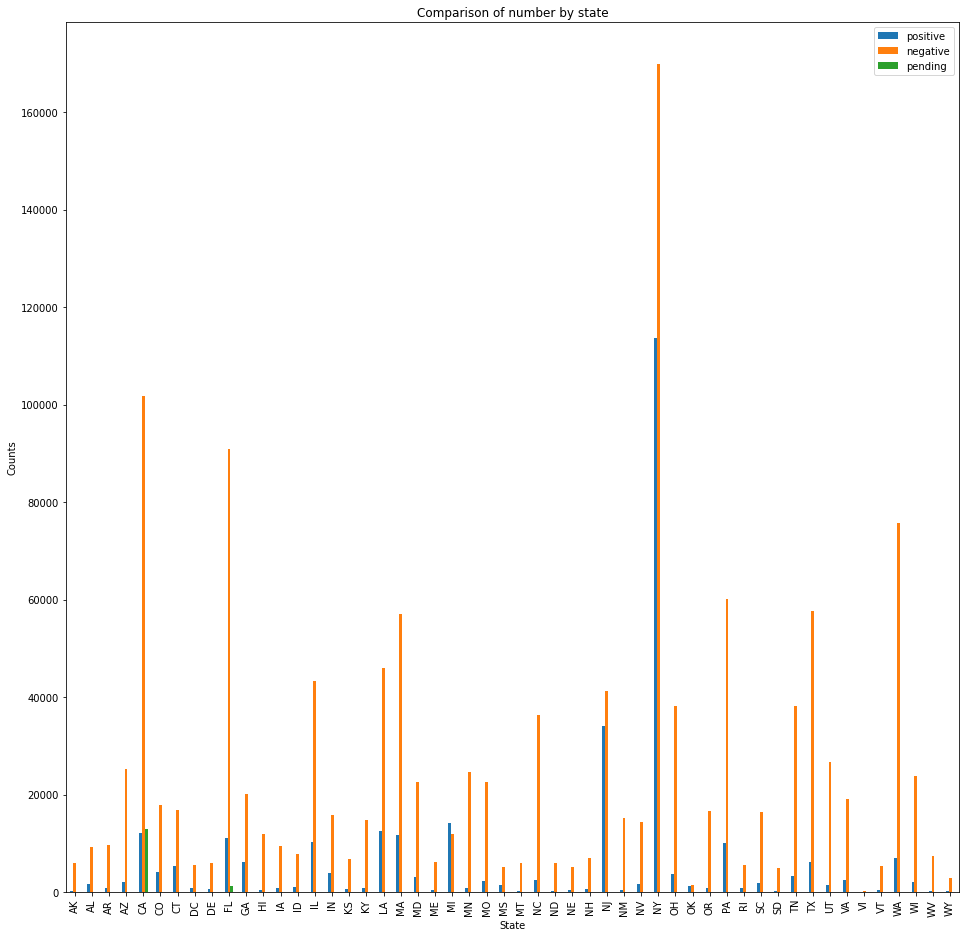

In [0]:
mydf.plot.bar(figsize = (16,16), x="state", y=["positive", "negative", 'pending'])
plt.xlabel("State")
plt.ylabel("Counts")
plt.title("Comparison of number by state")
plt.show()

This graph shows the positive, negative, and pending tests for each state. THe states with large backups in testing can be easily seen. As results from these pending tests come in, they can either be positive or negative, giving a range of 'stacking' the pending cases on top of the positive or negative columns. This is sort of an error bar for the current reporting of the states. 

The next data set is from the  U.S. census beuro and has a population estimate for every state in 2019 

In [0]:
#I want to see number of cases and tests for population of that state

In [0]:
df2 = pd.read_excel('CleanCensus.xlsx')
df2.head()

,Geographic Area,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,Census.1,2019PopEstimate
0,AK,710231,710249,713910,722128,730443,737068,736283,737498,741456,7.487795e+05,731545
1,AL,4779736,4780125,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4.874375e+06,4903185
2,AR,2915918,2916031,2921964,2940667,2952164,2959400,2967392,2978048,2989918,2.998359e+06,3017804
3,AZ,6392017,6392288,6407172,6472643,6554978,6632764,6730413,6829676,6941072,6.954363e+06,7278717
4,CA,37253956,37254519,37319502,37638369,37948800,38260787,38596972,38918045,39167117,3.935817e+07,39512223


In [0]:
#combining columns of the data frames to make a more easily graphable data frame
mydf2 = pd.DataFrame()
mydf2['state'] = df2['Geographic Area']
mydf2['Population'] = df2['2019PopEstimate']
mydf2['totalTests'] = df1['totalTestResults']
mydf2['positive'] = df1['positive']
mydf2['negative'] = df1['negative']
mydf2['testsPerPop%'] = mydf2['totalTests'].divide(mydf2['Population'])
mydf2['testsPerPop%'] *= 100
mydf2['positivePerPop%'] = mydf2['positive'].divide(mydf2['Population'])
mydf2['positivePerPop%'] *= 100
mydf2.head()

,state,Population,totalTests,positive,negative,testsPerPop%,positivePerPop%
0,AK,731545,7068,226,6842,0.966174,0.030894
1,AL,4903185,20605,2547,18058,0.420237,0.051946
2,AR,3017804,14530,1000,13530,0.481476,0.033137
3,AZ,7278717,34564,2726,31838,0.474864,0.037452
4,CA,39512223,154733,16957,137776,0.391608,0.042916


In [0]:
fig = px.scatter(mydf2, x="testsPerPop%", y="positivePerPop%", trendline="ols", text = mydf2['state'])
fig.update_layout(title = "Positive cases versus tests per population", xaxis_title = 'tests per population [%]', yaxis_title = 'positive cases per population [%]')
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



This graph is particularly interesting because it scales the tests and positive cases by the population of each state. Hover over each dot to see what state it is. From this graph, we can see that an increase in tests is associated with an increase in positive cases. This may mean that there are more cases that are unidentified and unaccounted for. There are also noticable outliers. Louisiana, New Jersey, and New York all appear to have worse breakouts than the other states. For New Jersey, this is interesting because they have about the same number of tests per population as RI, UT, NM, and HI, but much higher positive cases. This could also be due to back ups in the testing network of these states. 

It also is surprising to me that Lousiana and New York have both tested around 2% of their population. That seems like it would be a high number of tests but, I don't think a conclusion can be drawn yet about when there is too much testing.